# Week 4: Exploratory Data Analysis

### This dataset is Customer Churn Data from Kaggle where customers are classified in order such as the people who are still with that telecom company and the ones who left 

### Importing Libraries and Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("C:\\Users\\lavan\\OneDrive\\Desktop\\Customer Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Total Charges is in object i.e string so we have to convert it into float

In [11]:
data['TotalCharges']=data['TotalCharges'].replace(" ","0")
data["TotalCharges"]=data["TotalCharges"].astype("float")

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Checking for missing values

In [15]:
data.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
data.isnull().sum().sum()

0

## No missing value is there in this data

In [27]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Now, we need to check duplicates in data and we will check in unique id so that there are no more duplicates

In [30]:
data.duplicated().sum()

0

In [32]:
data["customerID"].duplicated().sum()

0

### In senior citizen column we will change it to yes/no for better understanding

In [35]:
def convert(value):
    if value==1:
        return "yes"
    else:
        return "no"

data['SeniorCitizen']=data['SeniorCitizen'].apply(convert)

In [37]:
data.head(25)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### Now we will find out the count of persons who left the company and onea who stayed

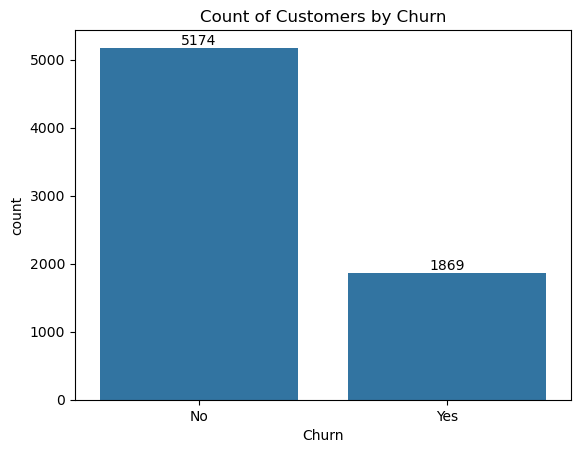

In [40]:
count=sns.countplot(x='Churn', data=data)
count.bar_label(count.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

## 1869 churned and 5174 stayed

### Now, we will groupby Churn data

In [44]:
gb=data.groupby("Churn").agg({'Churn':"count"})
gb

,Churn
Churn,
No,5174
Yes,1869


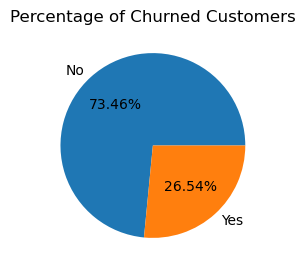

In [46]:
plt.figure(figsize=(3,3))
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customers")
plt.show()

### From the above pie chart it is clear that 26.54% people churned out and 73.46% stayed.

### Now let's find out that what was the reason behind prople who churned out

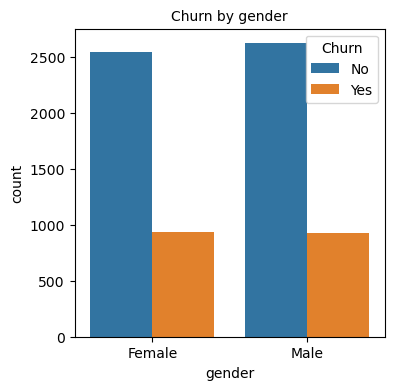

In [50]:
plt.figure(figsize=(4,4))
sns.countplot(x="gender", data=data, hue="Churn")
plt.title("Churn by gender", fontsize=10)
plt.show()

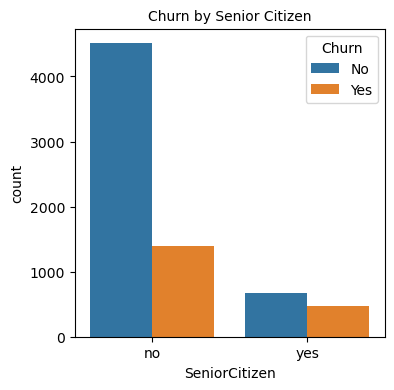

In [52]:
plt.figure(figsize=(4,4))
sns.countplot(x="SeniorCitizen", data=data, hue="Churn")
plt.title("Churn by Senior Citizen", fontsize=10)
plt.show()

### Stack Bar Chart which gives me labels at percentage to total

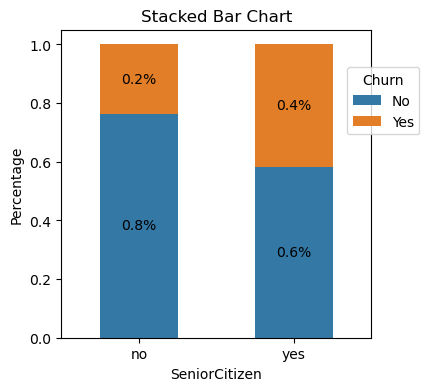

In [55]:
total_count=data.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()
fig, ax=plt.subplots(figsize=(4,4))
total_count.plot(kind='bar', stacked=True, ax=ax, color=['#3478A5', '#E17E27'])
for i in ax.patches:
    width, height=i.get_width(), i.get_height()
    x,y=i.get_xy()
    ax.text(x+width/2, y+height/2, f'{height:.1f}%', ha='center', va='center')

plt.title('Stacked Bar Chart')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor=(0.9,0.9))

plt.show()

### Comparatively, senior citizen mostly churned out

### Plotting histogram for tenure column

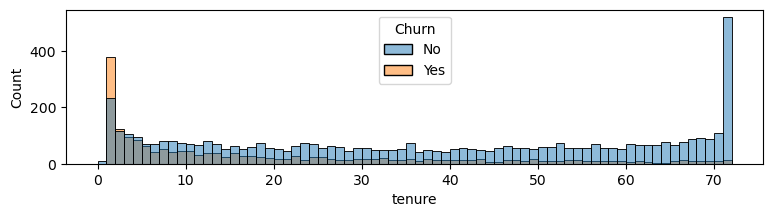

In [59]:
plt.figure(figsize=(9,2))
sns.histplot(x='tenure', data=data, bins=72, hue="Churn")
plt.show()

### From this histogram it is clear that customers who used our services stayed and customers who have used or sevices less churned out

### Customers Churned by Tenure

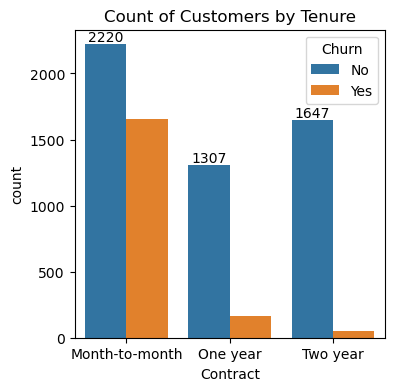

In [63]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract",data=data, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Tenure")
plt.show()

### Customers with monthly contracts are likely to churn than customers who have one or two year contracts

In [66]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

### Out of all columns we will create subplots from the data where each plot would be a countplot

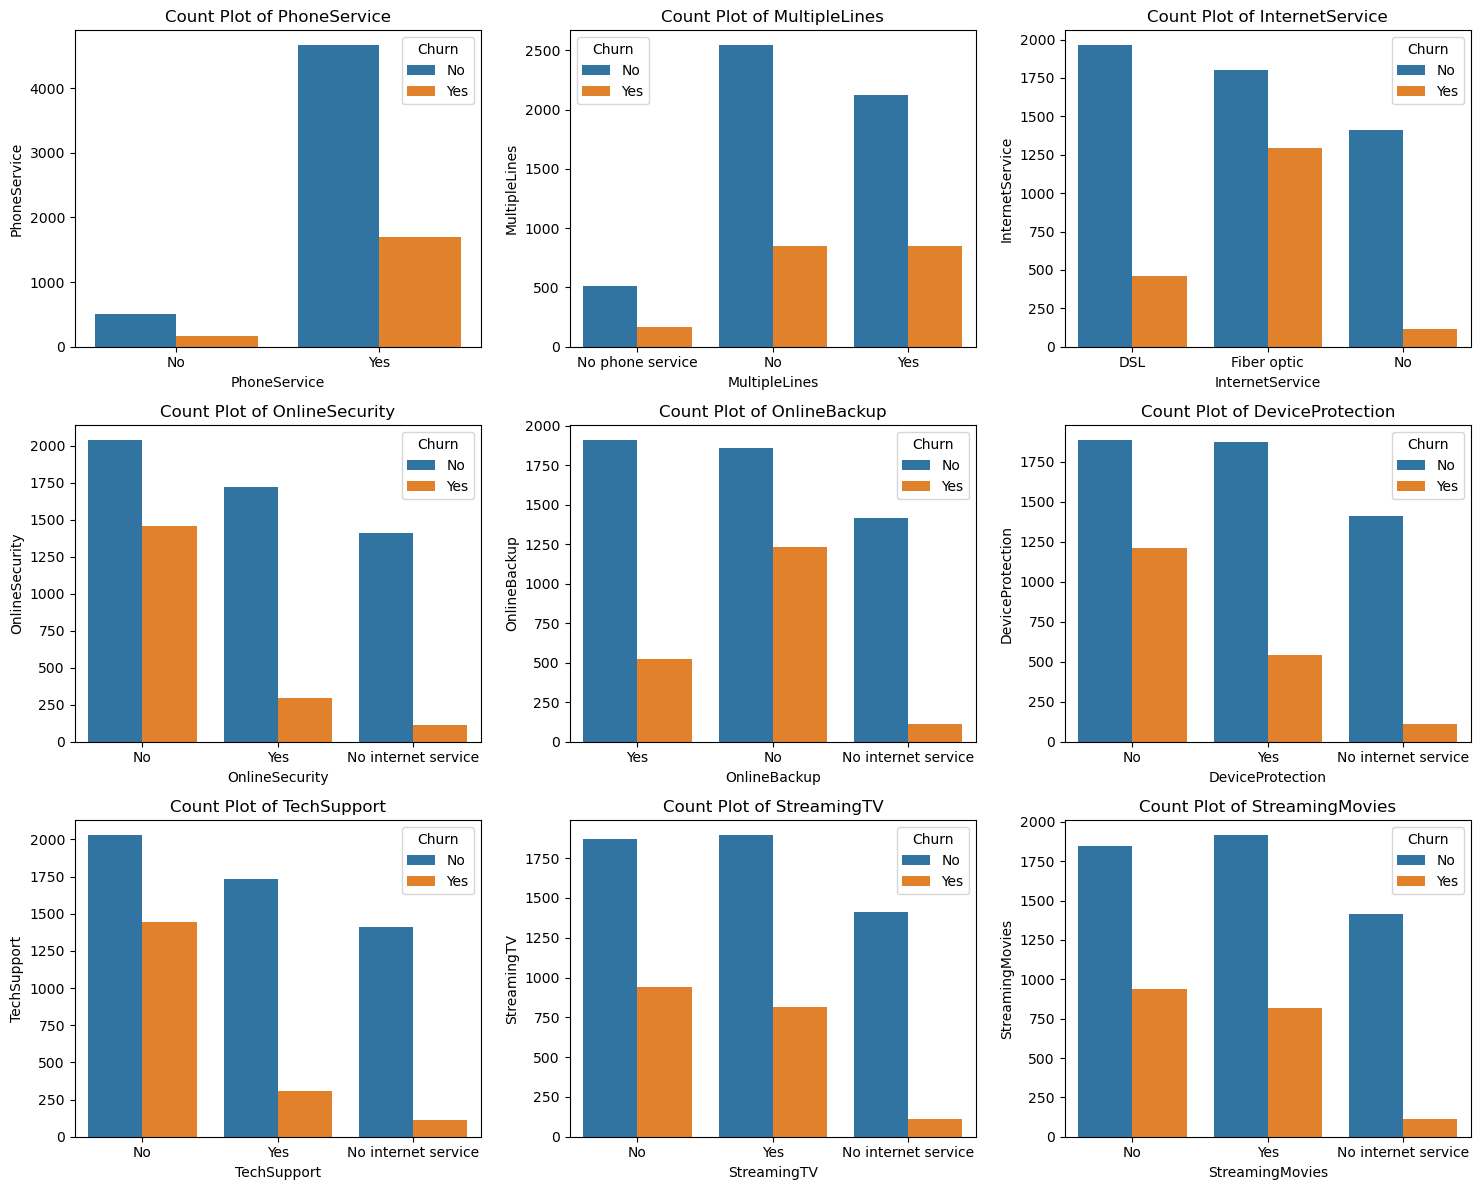

In [69]:
columns = ['PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']
n_cols=3
n_rows=(len(columns)+n_cols-1)//n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
axes = axes.flatten()  
for i, col in enumerate(columns):
    sns.countplot(x=col, data=data, ax=axes[i], hue=data["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(col)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

### From this countplot it is clear that the customers without services like *OnlineSecurity*, *TechSupport*, and *DeviceProtection* have higher churn rates and customers with *PhoneService* are less likely to churn. Additionally, users with *Fiber optic* internet show higher churn than those using DSL or having no internet service.


### Customers churned by payment methods

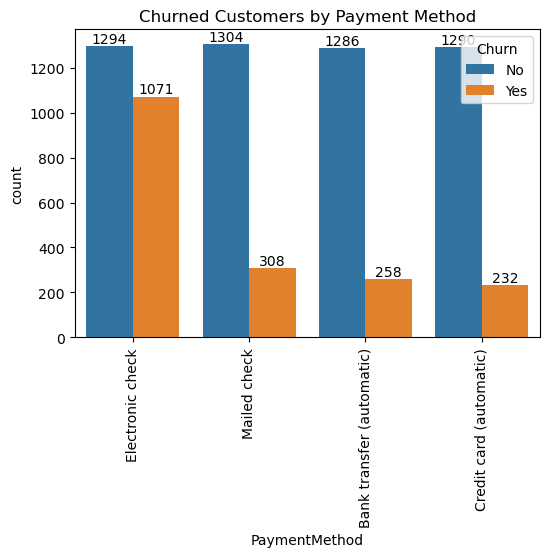

In [72]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = data, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 90)
plt.show()

## Feature Engineering

In [85]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [95]:
features = columns=['MonthlyCharges', 'tenure', 'TotalCharges']
features

['MonthlyCharges', 'tenure', 'TotalCharges']

In [99]:
target=['Churn']
target

['Churn']

In [107]:
from sklearn.model_selection import train_test_split
y = data[target]
x = data[features]

In [109]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state=42, stratify=y)

In [111]:
X_train

,MonthlyCharges,tenure,TotalCharges
5769,109.00,71,7661.80
1834,45.10,1,45.10
3168,19.35,50,1033.00
4205,78.60,24,1846.65
6218,58.40,70,4113.15
...,...,...,...
39,97.85,11,1105.40
4775,99.30,24,2431.35
358,30.75,27,805.10
2710,20.40,24,482.80


In [113]:
X_test

,MonthlyCharges,tenure,TotalCharges
402,99.45,69,7007.60
1292,84.50,62,5193.20
1175,80.00,13,1029.35
4600,115.85,56,6567.90
3464,83.85,31,2674.15
...,...,...,...
1401,99.80,4,442.85
213,20.00,29,540.05
5444,107.75,45,4882.80
3031,71.05,50,3444.85


In [115]:
y_train

,Churn
5769,No
1834,Yes
3168,No
4205,No
6218,No
...,...
39,Yes
4775,Yes
358,Yes
2710,No


In [117]:
y_test

,Churn
402,Yes
1292,No
1175,No
4600,No
3464,No
...,...
1401,Yes
213,No
5444,No
3031,Yes


### Customer is likely to churn when they are using electronic check as a payment method.


# SUMMARY

### 1. Around **26.54%** of the customers have churned or left the services.
### 2. **Senior Citizens** are more likely to churn compared to younger customers.
### 3. Customers with a **month-to-month contract** have a significantly higher churn rate than those with longer contracts (1 or 2 years).
### 4. Customers with **short tenure** (1–2 months) are more likely to leave, whereas long-term users tend to stay.
### 5. Churn is higher among customers who do not use services such as **OnlineSecurity, TechSupport, and OnlineBackup**.
### 6. Customers with **DSL** internet tend to stay longer compared to those using fiber optic.
### 7. The churn rate is highest among customers who pay via **electronic check**, indicating this method may be linked to dissatisfaction or inconvenience.
### 8. There is no major difference in churn rate based on **gender**.
### 9. Having **PhoneService and other value-added services** is linked to lower churn.








